In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Data_Train.xlsx")
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [3]:
#re-index columns
columns = ['Name', 'Location','Fuel_Type','Transmission', 'Owner_Type', 'Year', 'Kilometers_Driven',  'Mileage', 'Engine', 'Power', 'Seats','Price']
df = df.reindex(columns=columns)
df.head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,Petrol,Manual,First,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [6]:
#remove null value
df = df[df.Power!='null bhp']

In [7]:
#converting object to float types
df.Mileage = df.Mileage.str.replace(' km/kg',' kmpl')
df.Mileage = df.Mileage.str.replace(' kmpl','').astype(float)
df.Engine = df.Engine.str.replace(' CC','').astype(float)
df.Power = df.Power.str.replace(' bhp','').astype(float)

In [8]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5912.000000,5.912000e+03,5910.000000,5876.000000,5876.000000,5874.000000,5912.000000
mean,2013.450609,5.837766e+04,18.232195,1625.466133,113.253050,5.283623,9.584919
std,3.188638,9.189848e+04,4.432320,601.787379,53.874957,0.804961,11.233694
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.351275e+04,15.260000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.286250e+04,18.200000,1495.500000,97.700000,5.000000,5.700000
75%,2016.000000,7.245375e+04,21.100000,1991.000000,138.100000,5.000000,10.012500
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


- > There seems to be missing values by looking at count

In [9]:
df.isnull().sum()

Name                  0
Location              0
Fuel_Type             0
Transmission          0
Owner_Type            0
Year                  0
Kilometers_Driven     0
Mileage               2
Engine               36
Power                36
Seats                38
Price                 0
dtype: int64

- > Since there are not many missing values, we can remove them

In [10]:
#removing missing values
df = df.dropna(how='any')

In [11]:
df.nunique()

Name                 1811
Location               11
Fuel_Type               4
Transmission            2
Owner_Type              4
Year                   22
Kilometers_Driven    3038
Mileage               429
Engine                139
Power                 368
Seats                   8
Price                1364
dtype: int64

- > There are too many values for names, we could slice first name to get brands for our analysis

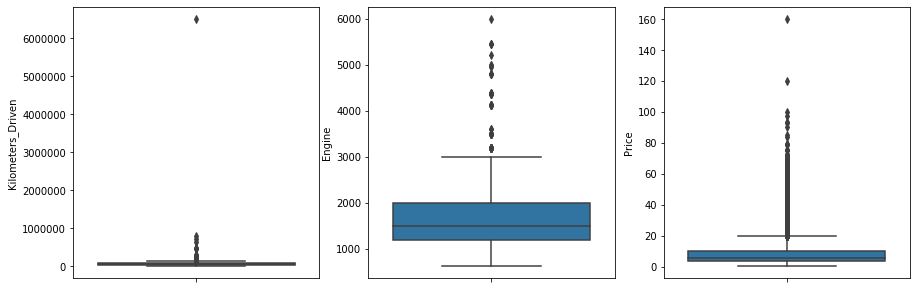

In [12]:
#checking for outliers
#Box plots
plt.figure(figsize=(15,5))

plt.subplot(131)
sns.boxplot(y="Kilometers_Driven", data=df)

plt.subplot(132)
sns.boxplot(y="Engine", data=df)

plt.subplot(133)
sns.boxplot(y="Price", data=df)

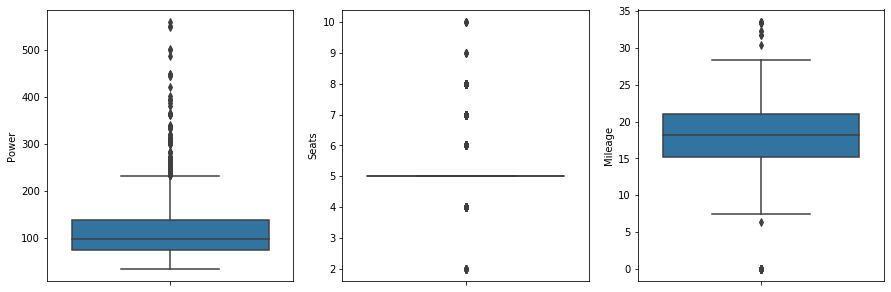

In [13]:
plt.figure(figsize=(15,5))

plt.subplot(131)
sns.boxplot(y="Power", data=df)

plt.subplot(132)
sns.boxplot(y="Seats", data=df)

plt.subplot(133)
sns.boxplot(y="Mileage", data=df)

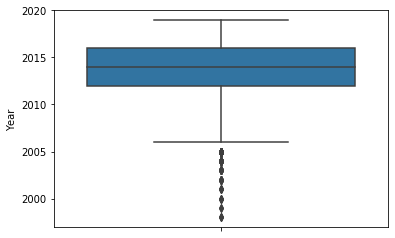

In [14]:
sns.boxplot(y="Year", data=df)

- > There are outliers in data

In [15]:
#Lets split names to get brands, we shall perform this on copy of original data frame
#We will use df_copy, when ever we need names to analyse
df_copy = df.copy()
df_copy.Name = df.Name.apply(lambda a:a.split()[0])

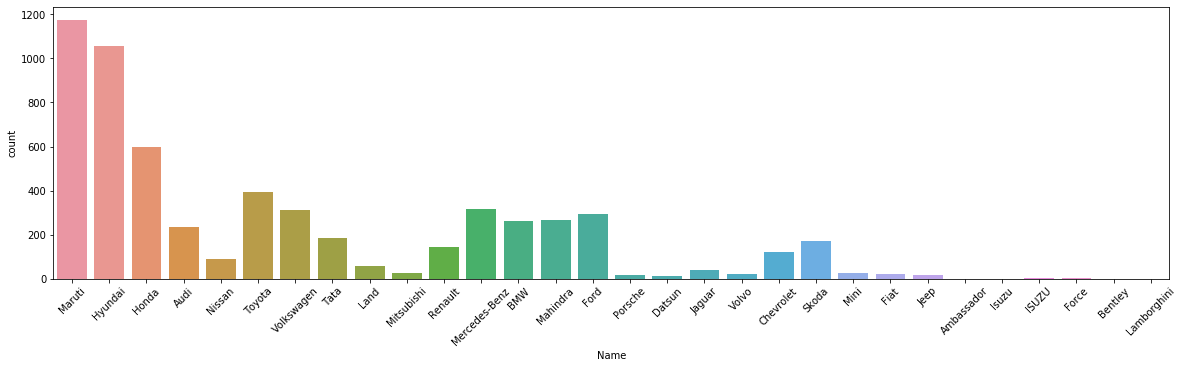

In [16]:
plt.figure(figsize=(20,5))
sns.countplot(df_copy.iloc[:,0],data=df_copy)
plt.xticks(rotation=45);

- > **Maruti** cars forms majority

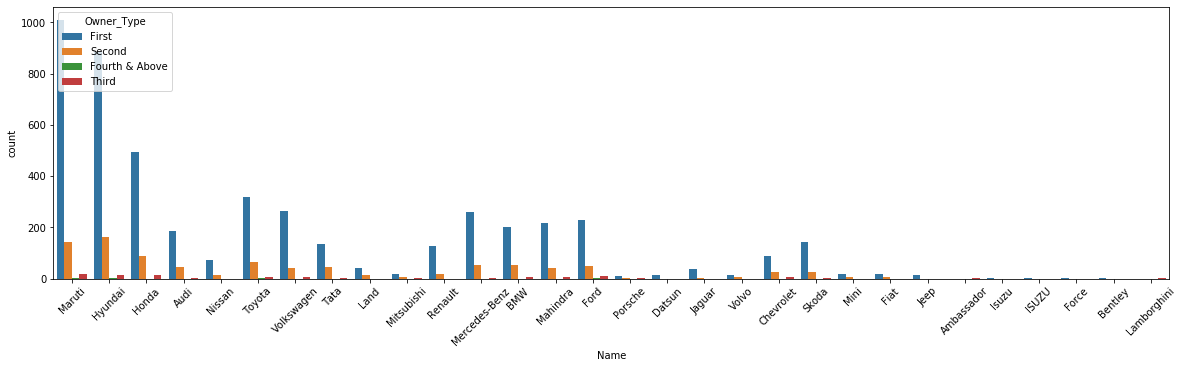

In [17]:
plt.figure(figsize=(20,5))
sns.countplot(df_copy.iloc[:,0],hue='Owner_Type',data=df_copy)
plt.xticks(rotation=45);

- > Majority of the cars are first handed

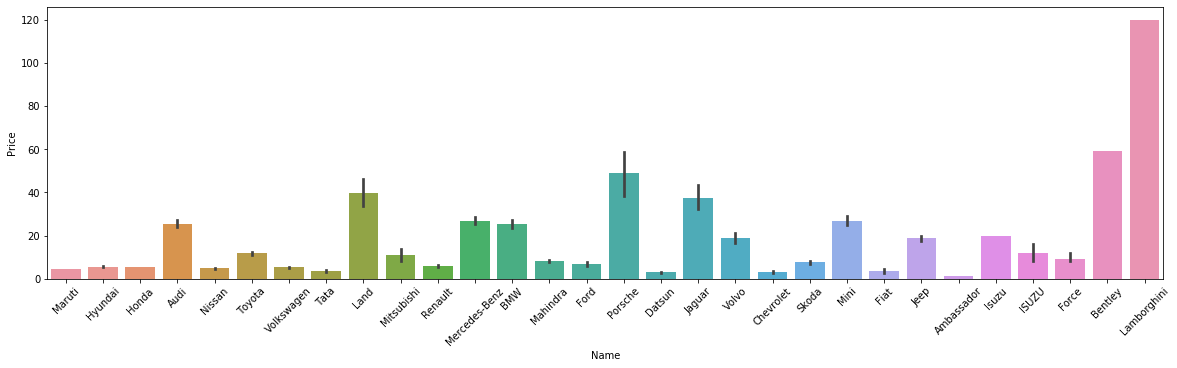

In [18]:
plt.figure(figsize=(20,5))
sns.barplot(x='Name',y='Price',data=df_copy)
plt.xticks(rotation=45);

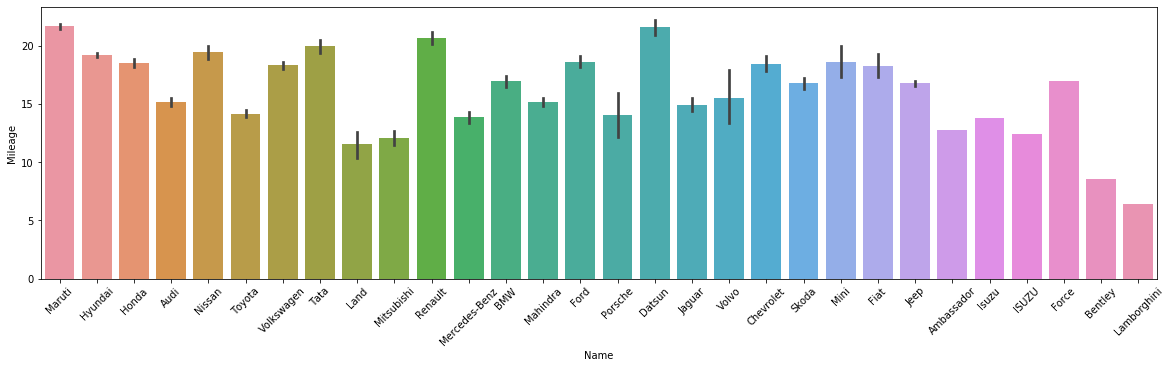

In [19]:
plt.figure(figsize=(20,5))
sns.barplot(x='Name',y='Mileage',data=df_copy)
plt.xticks(rotation=45);

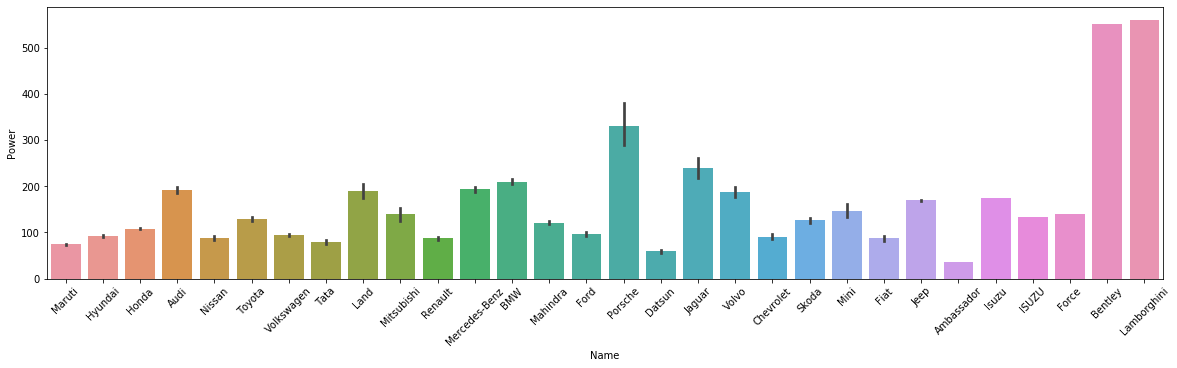

In [20]:
plt.figure(figsize=(20,5))
sns.barplot(x='Name',y='Power',data=df_copy)
plt.xticks(rotation=45);

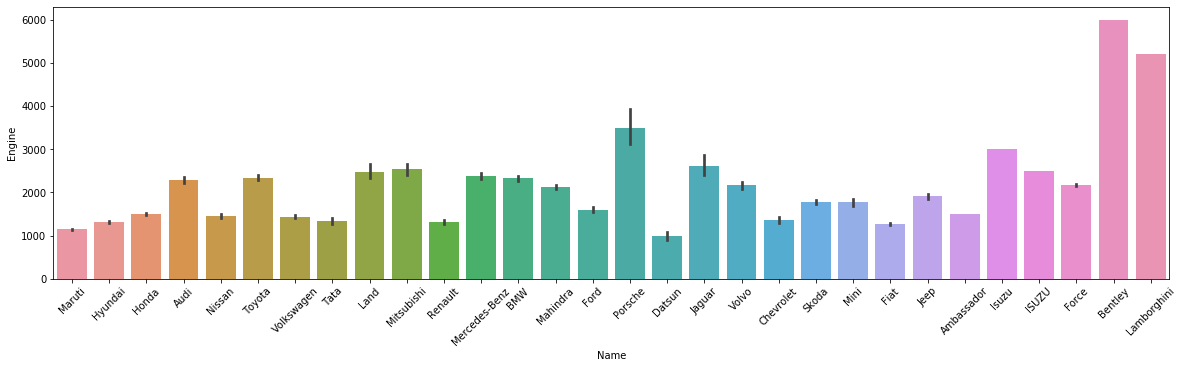

In [21]:
plt.figure(figsize=(20,5))
sns.barplot(x='Name',y='Engine',data=df_copy)
plt.xticks(rotation=45);

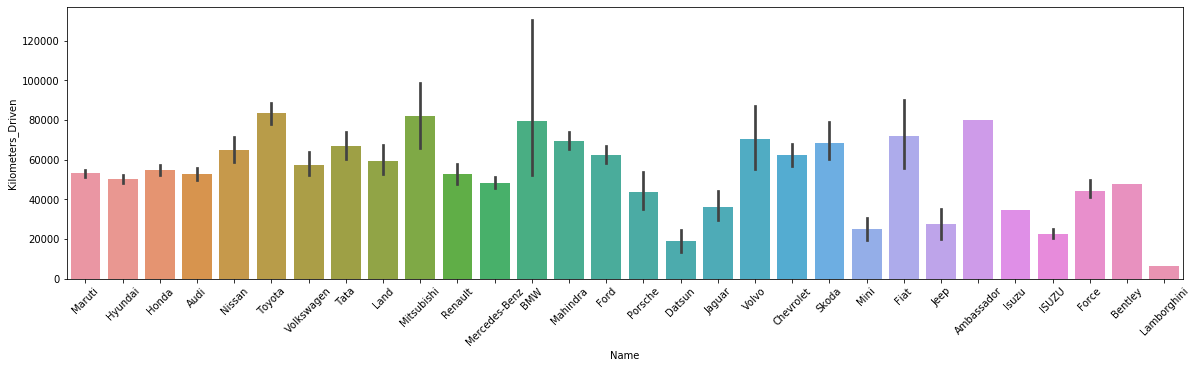

In [22]:
plt.figure(figsize=(20,5))
sns.barplot(x='Name',y='Kilometers_Driven',data=df_copy)
plt.xticks(rotation=45);

## Inferences on brands
- > Lambhorgini is the highest priced brand followed by Bently

- > Maruthi, Datsun cars have highest mileage

- > Bently, Lambhorgini offers highest engine power

- > Toyota, Mitsubhishi, BMW, Ambassador cars travelled the most

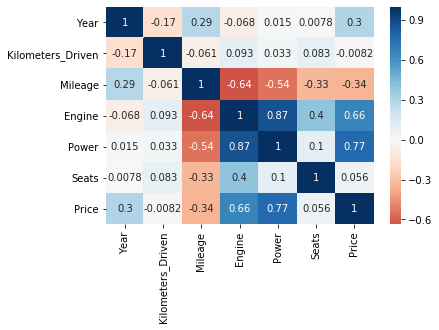

In [23]:
sns.heatmap(df.corr(),annot=True,cmap='RdBu', center=0)

- > From above heatmap, we can see Engine and Power are correlated also Year and Mileage are correlated

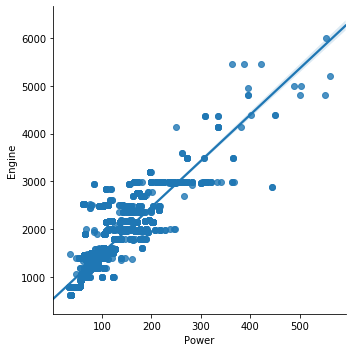

In [24]:
sns.lmplot(x='Power',y='Engine',data=df)

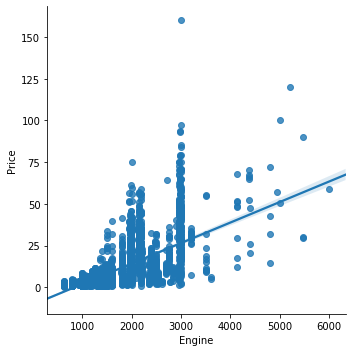

In [25]:
sns.lmplot(x='Engine',y='Price',data=df)

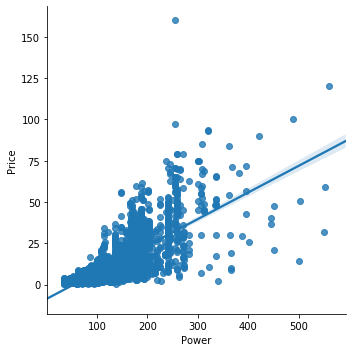

In [26]:
sns.lmplot(x='Power',y='Price',data=df)

- > From above plots we can see that Engine and Power are correlated

- > Also Power and Price are correlated, so we can drop Engine column

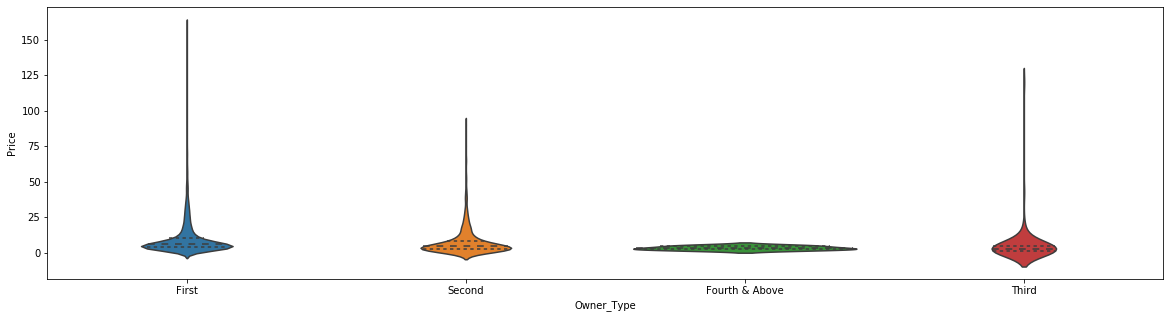

In [27]:
plt.figure(figsize=(20,5))

sns.violinplot(x='Owner_Type',y='Price',data=df,split=True,inner='quart')

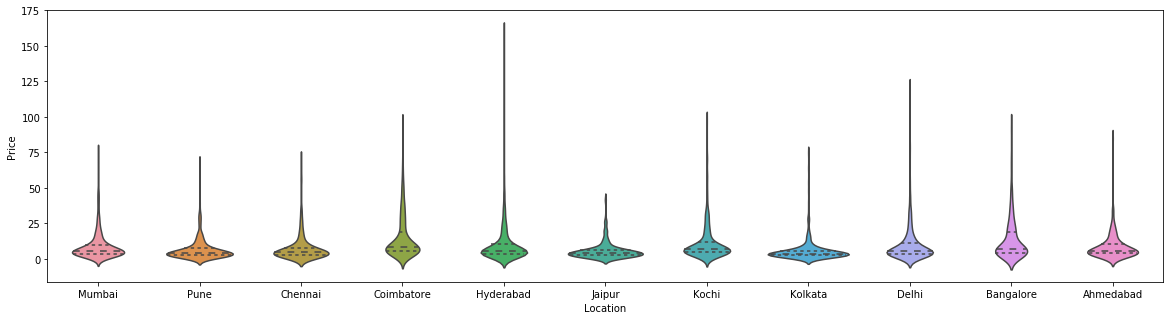

In [28]:
plt.figure(figsize=(20,5))

sns.violinplot(x='Location',y='Price',data=df,split=True,inner='quart')

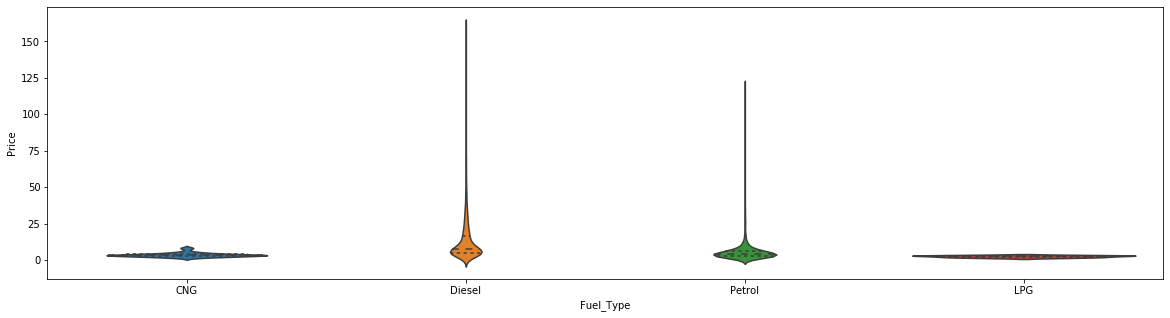

In [29]:
plt.figure(figsize=(20,5))

sns.violinplot(x='Fuel_Type',y='Price',data=df,split=True,inner='quart')

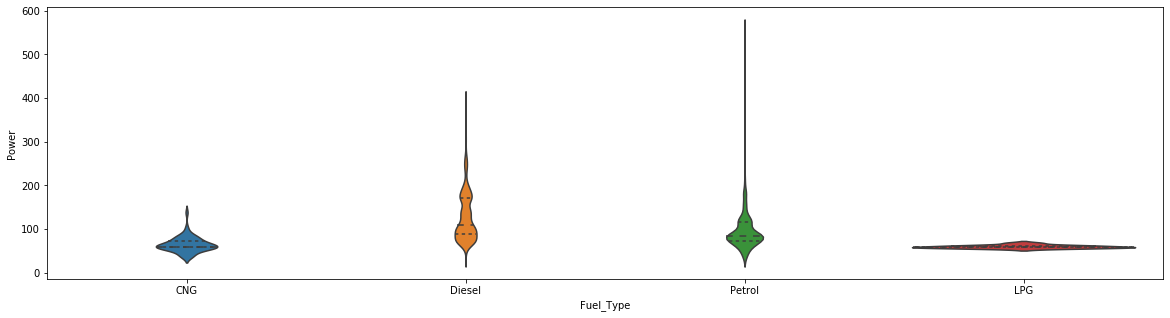

In [36]:
plt.figure(figsize=(20,5))

sns.violinplot(x='Fuel_Type',y='Power',data=df,split=True,inner='quart')

## Inferences from Violin plots

- > Newer the car higher the price, which is expected

- > We can see that all locations have similar violin plots against prices, this means that location has little or no importance in predicting prices. So we can remove that

- > Diesel cars priced higher

- > Petrol and Diesel cars offers high engine power

C:\Users\Subbu S\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


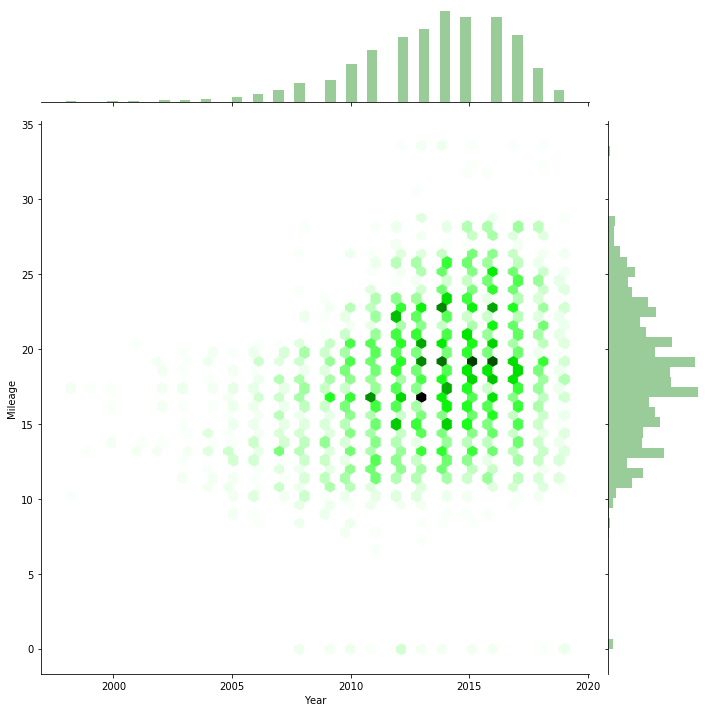

In [31]:
sns.jointplot(x='Year',y='Mileage',data=df,kind="hex",size=10,color="g")

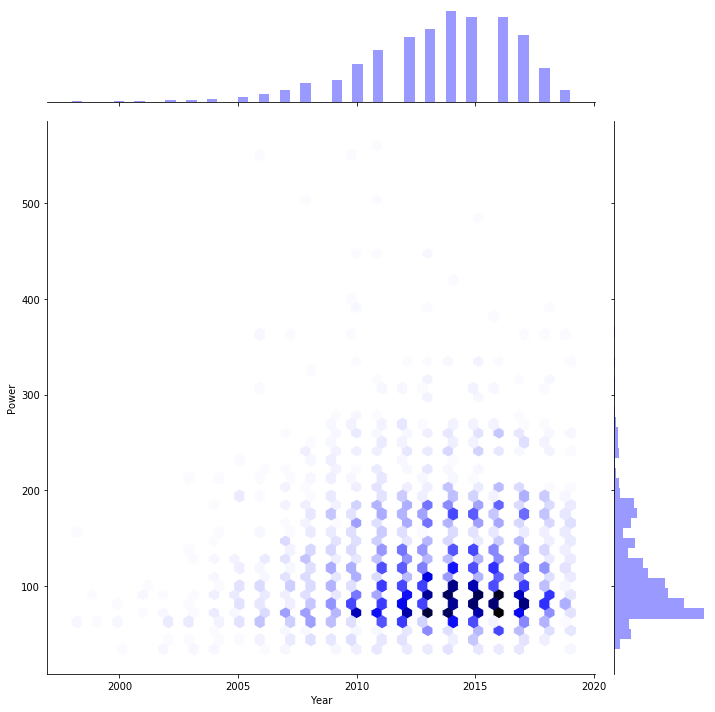

In [32]:
sns.jointplot(x='Year',y='Power',data=df,kind="hex",size=10,color="b")

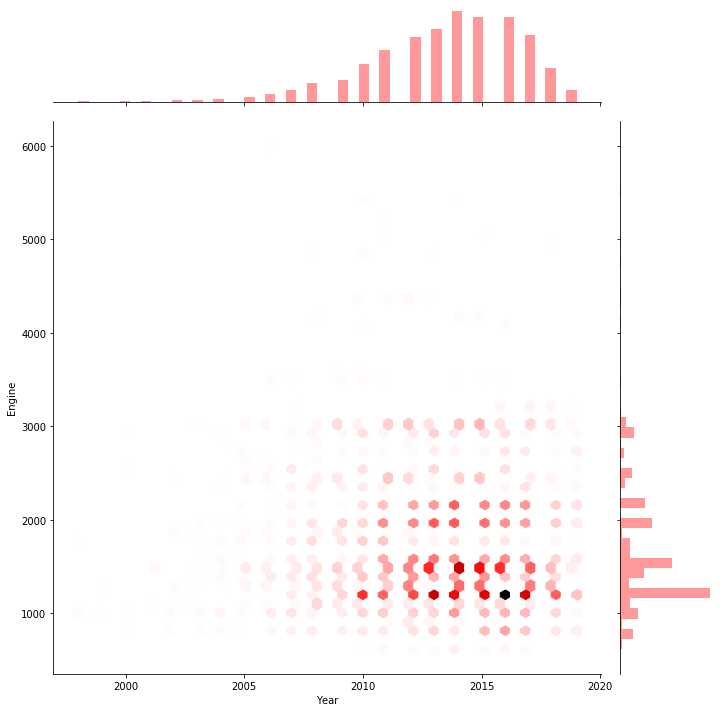

In [33]:
sns.jointplot(x='Year',y='Engine',data=df,kind="hex",size=10,color="r")

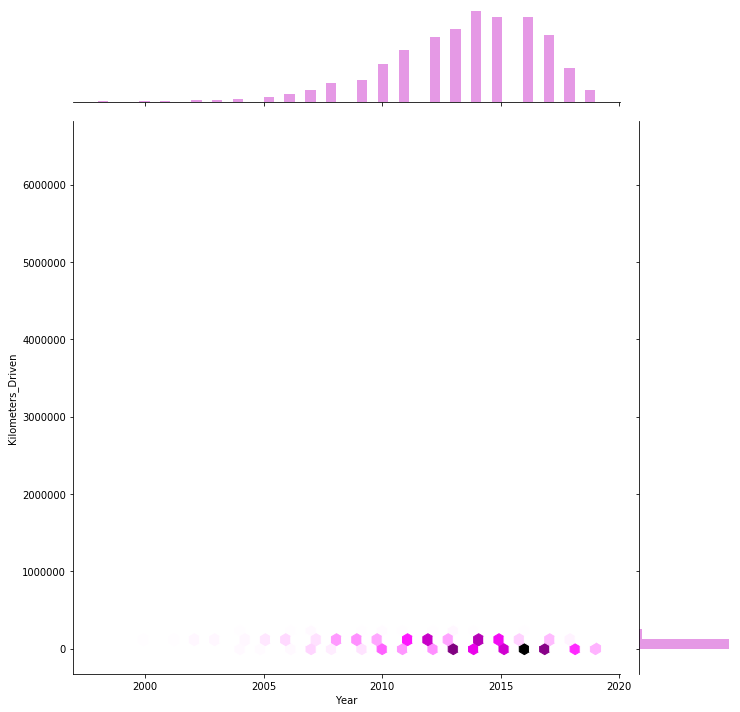

In [34]:
sns.jointplot(x='Year',y='Kilometers_Driven',data=df,kind="hex",size=10,color="m")

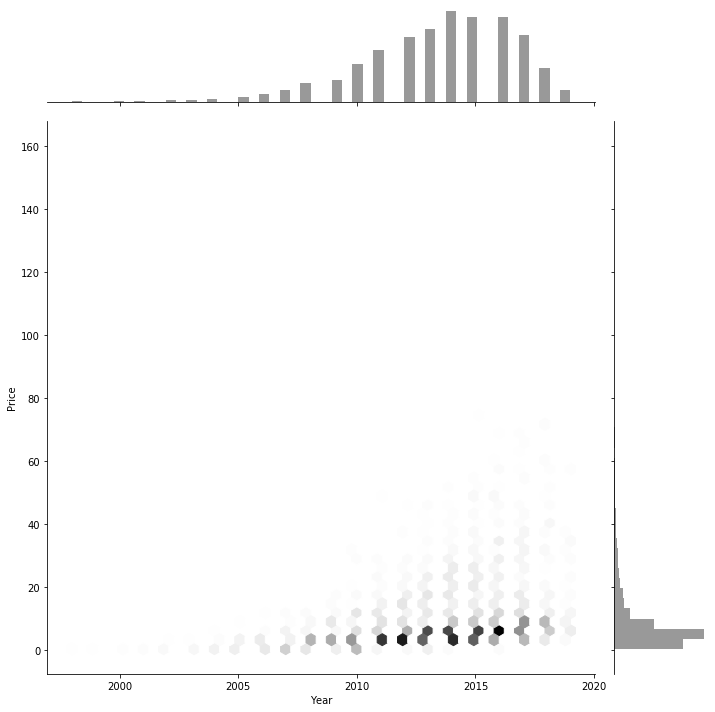

In [35]:
sns.jointplot(x='Year',y='Price',data=df,kind="hex",size=10,color="k")